# RWSI: Our main mission is to find that out of the people visiting our site , who will buy something so that we can shift our focus on those users.


The Big Idea: The entire project revolves around predicting a Conversion.Conversion (MonetaryConversion): This is the ultimate event—the user actually bought something (it's the 1 in your data).The Predictive Problem: You need to build a model that looks at a user's behavior during a single visit (a "session") and says, "There's an {X\%} chance this person is going to buy something.

Why it Matters

By predicting this, the company can:
1. Give discounts or special offers only to the high-potential shoppers.
2. Identify the best-performing pages on their site.
3. Understand what makes a "casual browser" different from a "high-intent shopper."

# there are multiple phases in building any project

phase 1: Understanding the data and performing EDA

phase 2: preparing the data - handle missing values and engineer new features

phase 3: Building predictive model, evaluating performance and interpret model results

phase 4: conclusion and findings

In [228]:
## phase 1: EDA

## importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [229]:
## accessing file
df = pd.read_csv('rwsi_data.csv')

In [230]:
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClientCode          11714 non-null  object 
 15  Ma

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AdClicks,11467.0,1.993459,1.420444,0.0,1.000000,2.000000,3.000000,4.000000
InfoSectionCount,11961.0,2.318201,3.326956,0.0,0.000000,1.000000,4.000000,27.000000
InfoSectionTime,11961.0,80.871460,177.208946,0.0,0.000000,8.000000,92.933333,3398.750000
HelpPageVisits,12084.0,0.502565,1.271441,0.0,0.000000,0.000000,0.000000,24.000000
HelpPageTime,12084.0,34.420615,141.209531,0.0,0.000000,0.000000,0.000000,2549.375000
ItemBrowseCount,11837.0,31.717749,44.390208,0.0,7.000000,18.000000,38.000000,705.000000
ItemBrowseTime,11837.0,1196.681677,1918.148954,0.0,185.000000,598.250000,1469.666667,63973.522230
ExitRateFirstPage,12207.0,0.022234,0.048551,0.0,0.000000,0.003125,0.016923,0.200000
SessionExitRatio,12084.0,0.043130,0.048623,0.0,0.014286,0.025222,0.050000,0.200000
PageEngagementScore,11961.0,5.885423,18.557293,0.0,0.000000,0.000000,0.000000,361.763742


If mean >> max → there’s an outlier or some very big numbers.(InfoSectionTime, InfoSectionCount, PageEngagementScore)

If mean ≈ max → numbers are fairly evenly spread.

In [233]:
df.shape

(12330, 20)

In [234]:
df.columns.tolist()

['SessionID',
 'AdClicks',
 'InfoSectionCount',
 'InfoSectionTime',
 'HelpPageVisits',
 'HelpPageTime',
 'ItemBrowseCount',
 'ItemBrowseTime',
 'ExitRateFirstPage',
 'SessionExitRatio',
 'PageEngagementScore',
 'HolidayProximityIndex',
 'VisitMonth',
 'UserPlatformID',
 'WebClientCode',
 'MarketZone',
 'TrafficSourceCode',
 'UserCategory',
 'IsWeekendVisit',
 'MonetaryConversion']

In [235]:
## checking for missing values
df.isnull().sum()

,0
SessionID,0
AdClicks,863
InfoSectionCount,369
InfoSectionTime,369
HelpPageVisits,246
HelpPageTime,246
ItemBrowseCount,493
ItemBrowseTime,493
ExitRateFirstPage,123
SessionExitRatio,246


In [236]:
## chacking for duplicate values
df.nunique()

,0
SessionID,12330
AdClicks,5
InfoSectionCount,27
InfoSectionTime,3259
HelpPageVisits,17
HelpPageTime,1238
ItemBrowseCount,306
ItemBrowseTime,9199
ExitRateFirstPage,1859
SessionExitRatio,4695


Performing Univariate analysis

In [237]:
## now i will separate numerical and categorical columns for performing univariate analysis

categorical_cols = df.select_dtypes(include='object').columns.tolist()

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()


In [238]:
categorical_cols

['SessionID',
 'VisitMonth',
 'UserPlatformID',
 'WebClientCode',
 'MarketZone',
 'UserCategory',
 'MonetaryConversion']

In [239]:
numerical_cols

['AdClicks',
 'InfoSectionCount',
 'InfoSectionTime',
 'HelpPageVisits',
 'HelpPageTime',
 'ItemBrowseCount',
 'ItemBrowseTime',
 'ExitRateFirstPage',
 'SessionExitRatio',
 'PageEngagementScore',
 'HolidayProximityIndex',
 'TrafficSourceCode']

In [240]:
## Univariate analysis on numerical features

print(df[numerical_cols].describe().T)


                         count         mean          std  min         25%  \
AdClicks               11467.0     1.993459     1.420444  0.0    1.000000   
InfoSectionCount       11961.0     2.318201     3.326956  0.0    0.000000   
InfoSectionTime        11961.0    80.871460   177.208946  0.0    0.000000   
HelpPageVisits         12084.0     0.502565     1.271441  0.0    0.000000   
HelpPageTime           12084.0    34.420615   141.209531  0.0    0.000000   
ItemBrowseCount        11837.0    31.717749    44.390208  0.0    7.000000   
ItemBrowseTime         11837.0  1196.681677  1918.148954  0.0  185.000000   
ExitRateFirstPage      12207.0     0.022234     0.048551  0.0    0.000000   
SessionExitRatio       12084.0     0.043130     0.048623  0.0    0.014286   
PageEngagementScore    11961.0     5.885423    18.557293  0.0    0.000000   
HolidayProximityIndex  11837.0     0.061806     0.199556  0.0    0.000000   
TrafficSourceCode      11714.0     4.069489     4.031417  1.0    2.000000   

* Look at these three:

PageEngagementScore: mean = 5.88, but median = 0

InfoSectionTime: mean = 80.87, median = 8

ItemBrowseTime: mean = 1196, median = 598

This means:
Most users hardly engage, but a tiny group of power users spend a lot of time — they’re driving the average way up.

Ad Clicks Behavior Is Stable — but Capped

AdClicks mean = 1.99, std = 1.42, max = 4

That’s a tight distribution — most users click between 1–4 ads max.
That’s actually surprisingly consistent behavior compared to the rest of the features.

Insight:

“User ad-click behavior is remarkably stable — almost no one clicks beyond 4 ads per session, suggesting ad fatigue or effective capping in the ad-serving logic.”

“Help page usage is extremely polarized — 75% of users never seek help, but the few who do spend long durations there (up to 40 minutes!), possibly due to poor UX or confusing product flows.”

ItemBrowseTime mean = 1196s, max = 63973s (~18 hours)
That’s clearly an outlier — maybe the user left the tab open overnight.

This suggests multiple acquisition channels.
The mean (4.07) and std (4.03) indicate users are fairly distributed across them — no single dominant traffic source.
“Traffic sources are well-diversified — the average code (≈4) and wide std suggest that our marketing or referral strategies attract traffic from multiple channels equally, not just one.”

HolidayProximityIndex Is Mostly Zero

Mean = 0.06, median = 0, 75% = 0

Most data points are not near a holiday, but a few are — probably close to major festivals.

Insight:

“Since 94% of sessions occur outside holiday periods, any sales or engagement spikes during holidays will be statistically distinct — perfect for feature engineering around ‘holiday effect.’”

Exit Rates Show Strong User Retention

ExitRateFirstPage median = 0.0031, mean = 0.022

SessionExitRatio median = 0.025, mean = 0.043

This is low exit behavior — most users don’t drop after the first page.
That’s good UX performance or a strong content hook.

Insight:

“Exit ratios are impressively low (median ≈ 2–4%), implying high user stickiness or a well-structured landing flow.”

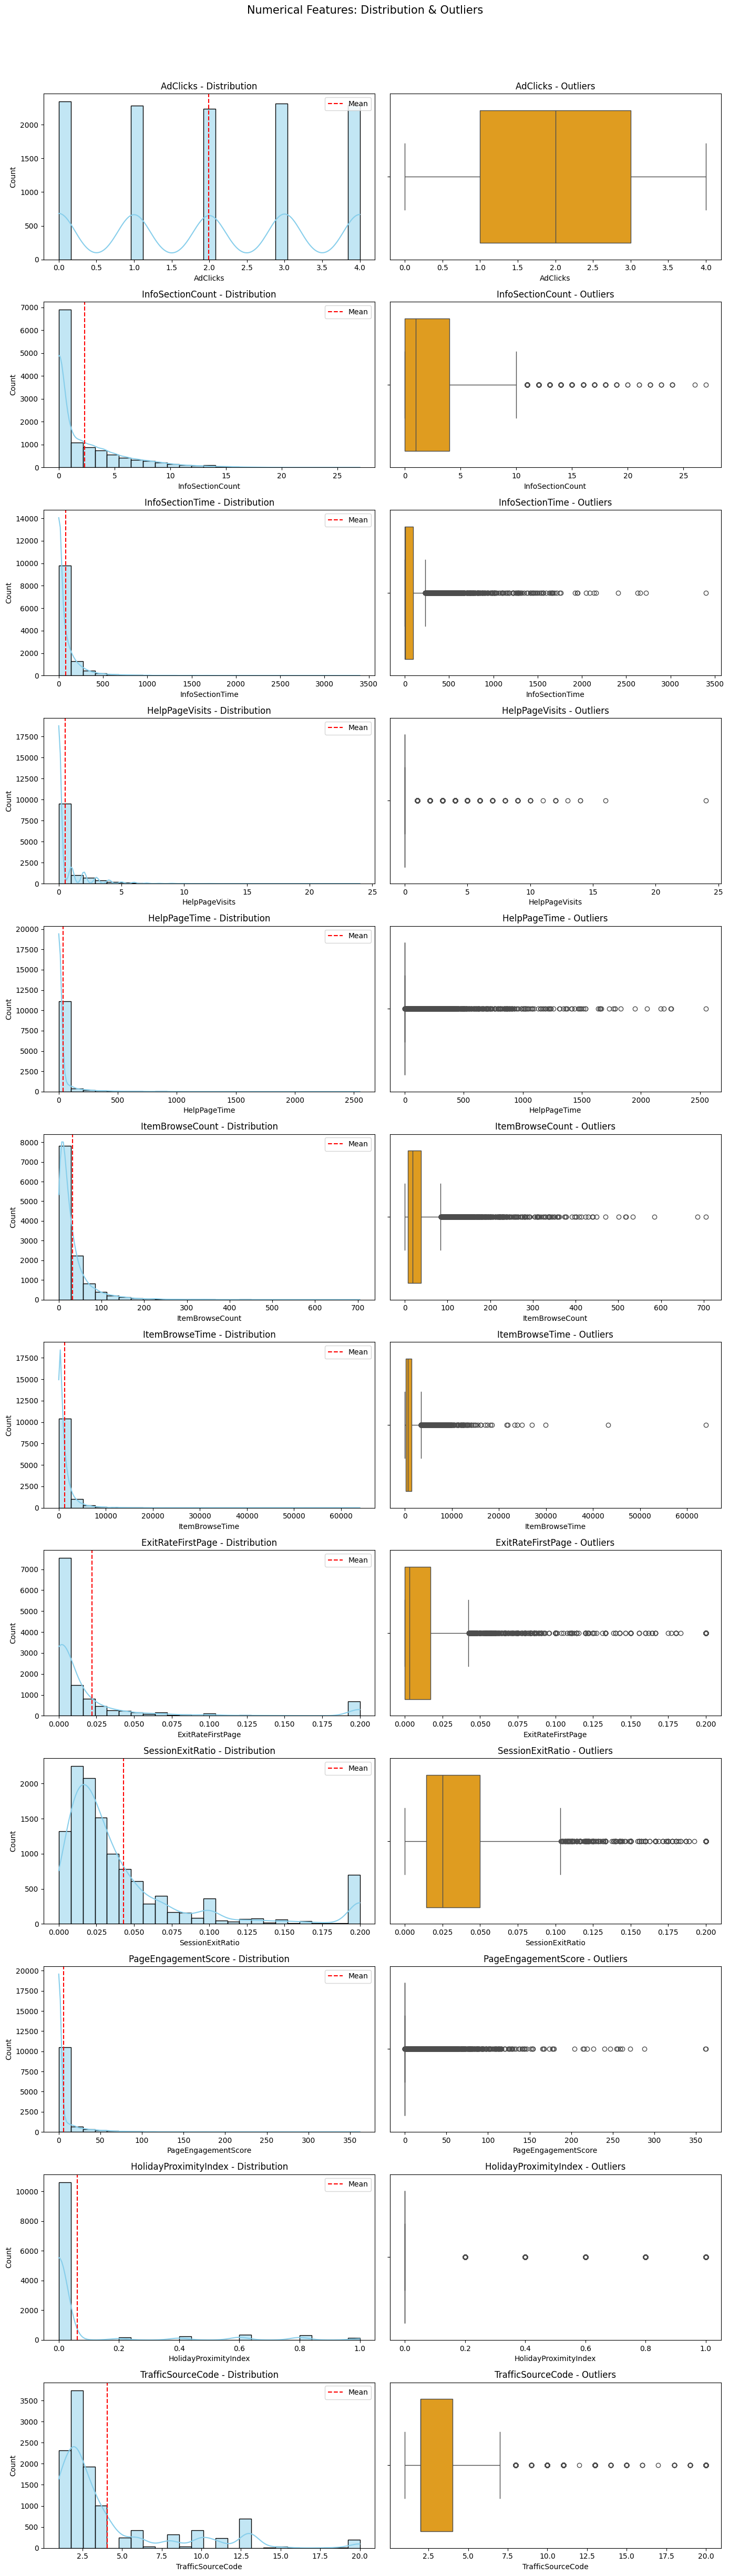

In [241]:
# Numerical Data Visualization - Distribution & Outliers

fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(14, 4 * len(numerical_cols)))
plt.suptitle('Numerical Features: Distribution & Outliers', fontsize=15, y=1.02)

for i, col in enumerate(numerical_cols):
    # Distribution (Histogram)
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i, 0], color='skyblue', bins=25)
    axes[i, 0].set_title(f'{col} - Distribution')
    axes[i, 0].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i, 0].legend()

    # Outliers (Boxplot)
    sns.boxplot(x=df[col].dropna(), ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'{col} - Outliers')

plt.tight_layout()
plt.show()


# So, here we have seen that most of the numerical features are right skewed(positively skewed), which means most of the data points are on the left of the peak, and the mean is generally greater than the median.

Original Categorical Columns for Plotting: ['VisitMonth', 'UserPlatformID', 'WebClientCode', 'MarketZone', 'UserCategory']


/tmp/ipython-input-829110571.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette='coolwarm', order=df_original[col].value_counts().index)


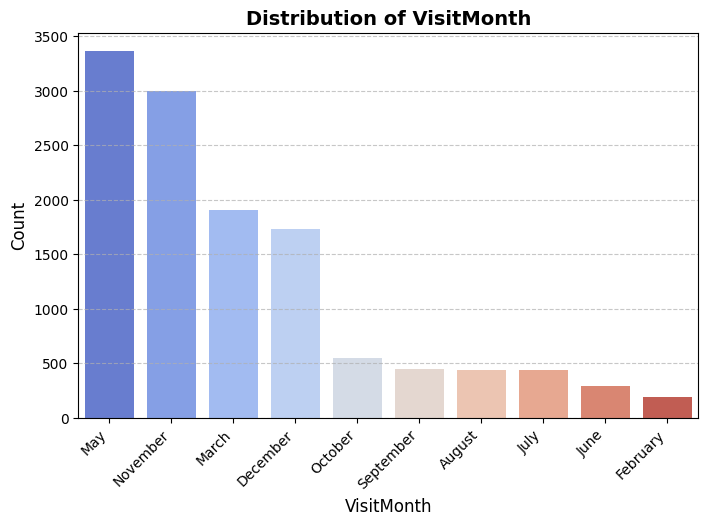

/tmp/ipython-input-829110571.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette='coolwarm', order=df_original[col].value_counts().index)


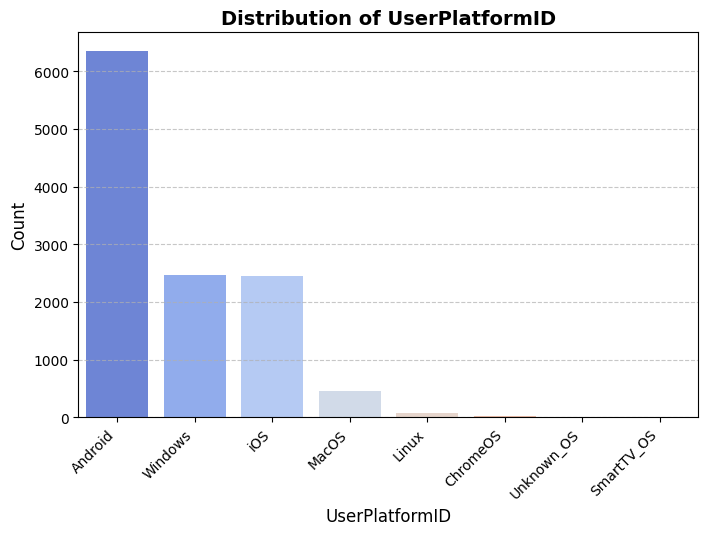

/tmp/ipython-input-829110571.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette='coolwarm', order=df_original[col].value_counts().index)


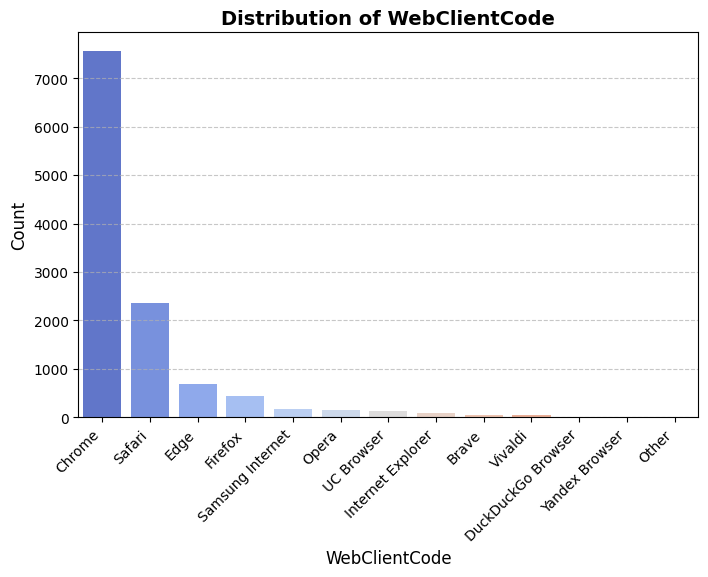

/tmp/ipython-input-829110571.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette='coolwarm', order=df_original[col].value_counts().index)


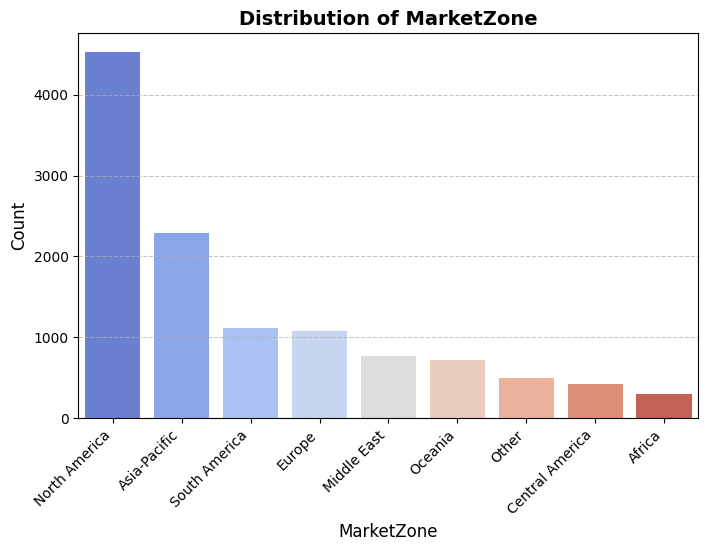

/tmp/ipython-input-829110571.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette='coolwarm', order=df_original[col].value_counts().index)


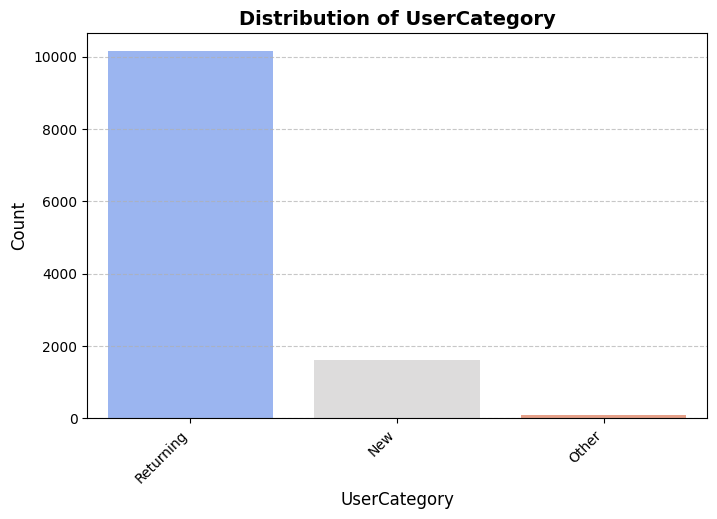

In [337]:
## distribution of categorical columns

df_original = pd.read_csv('rwsi_data.csv')

# Define original categorical columns, excluding 'SessionID' and the target
original_categorical_cols = df_original.select_dtypes(include='object').columns.tolist()
cols_to_remove_original = ["SessionID", "MonetaryConversion"]
original_categorical_cols_for_plotting = [col for col in original_categorical_cols if col not in cols_to_remove_original]

print(f"Original Categorical Columns for Plotting: {original_categorical_cols_for_plotting}")

for col in original_categorical_cols_for_plotting:
    plt.figure(figsize=(8, 5))
    # Use the original DataFrame for plotting
    sns.countplot(data=df_original, x=col, palette='coolwarm', order=df_original[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Insights:
* Google Chrome is used by most the people to access website.
* Best Operating System for website is Android Mobile, IOS and Windows. Almost 95% of World Population is using this 3 operating system which is good for website.
* North America and Asia-Pacific have more market and activity. but we have to work for Central America and Africa.
* On website people visit more and more so dataset contain more returning visitor
* people visit site in non weekend days

# Now i will perform bivariate analysis

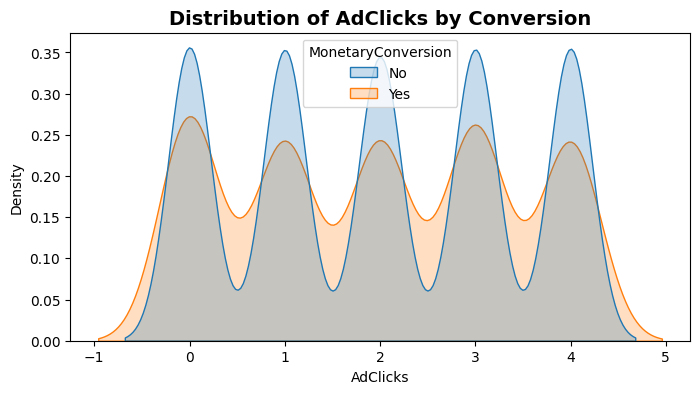

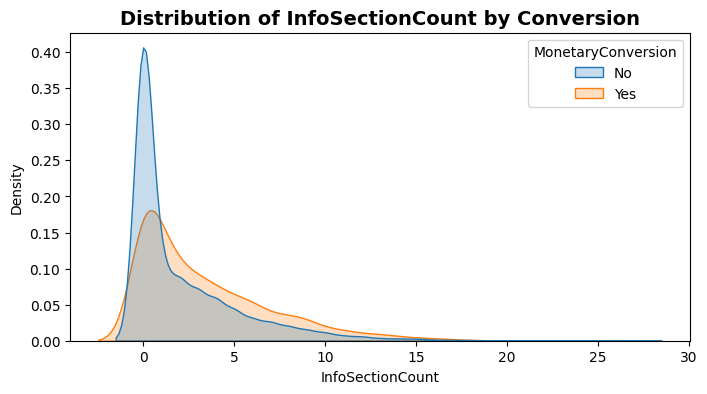

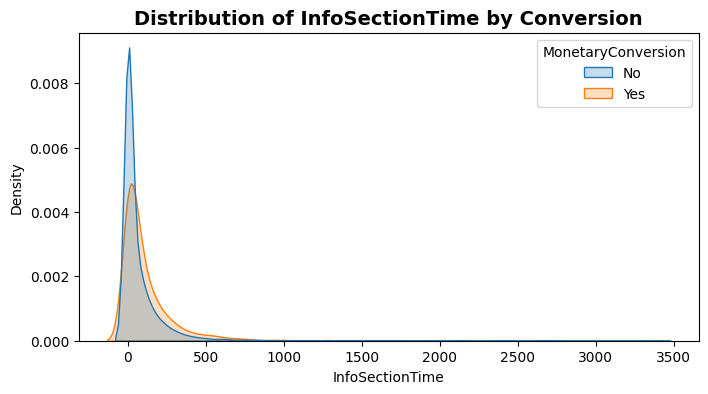

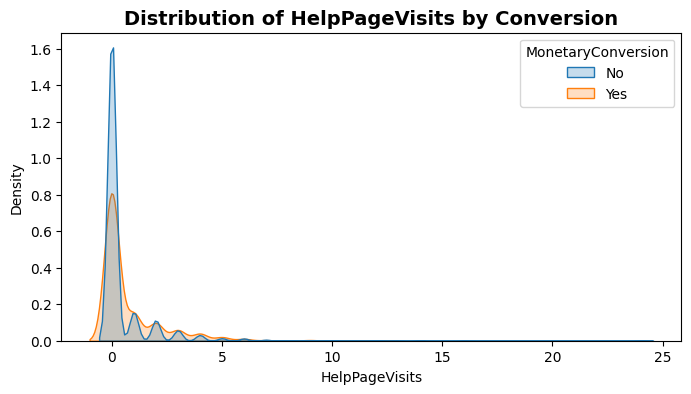

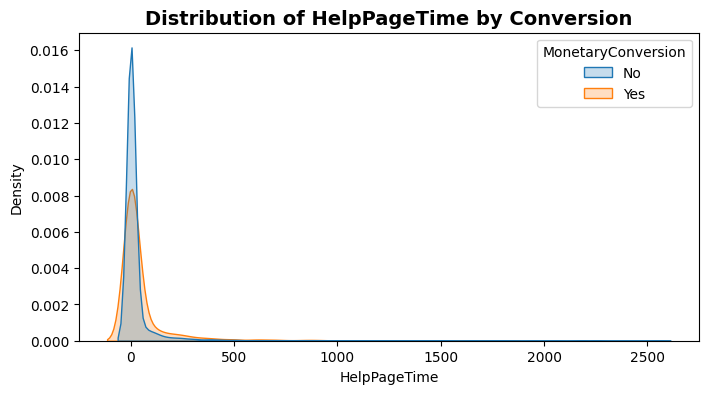

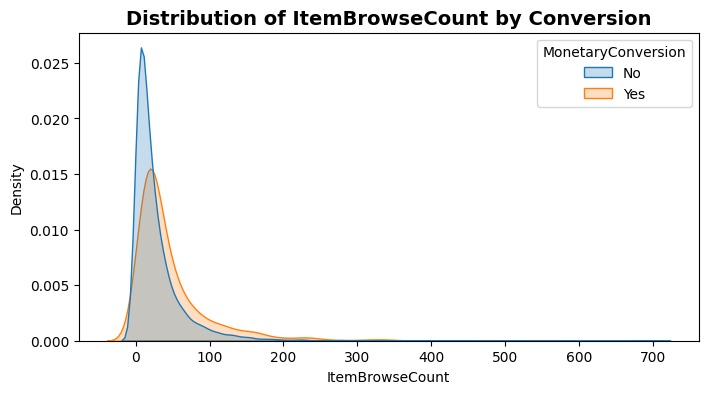

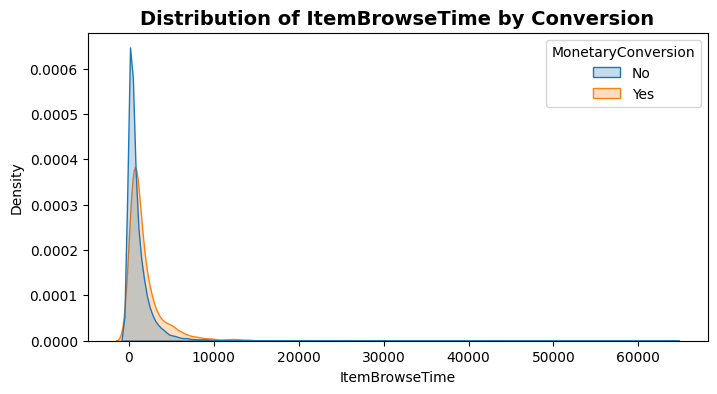

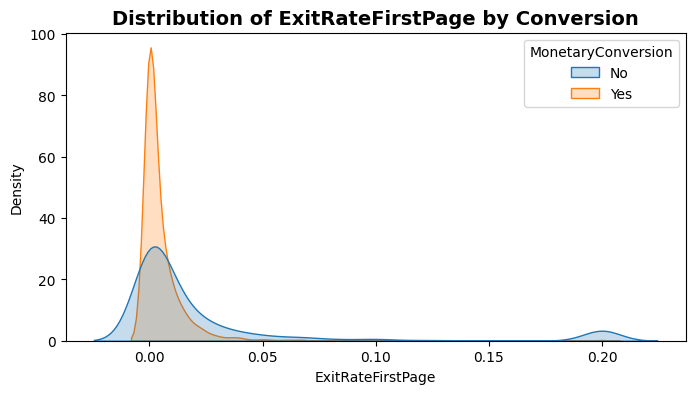

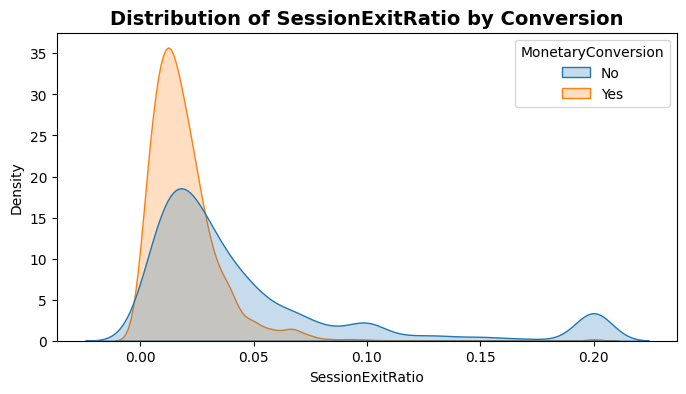

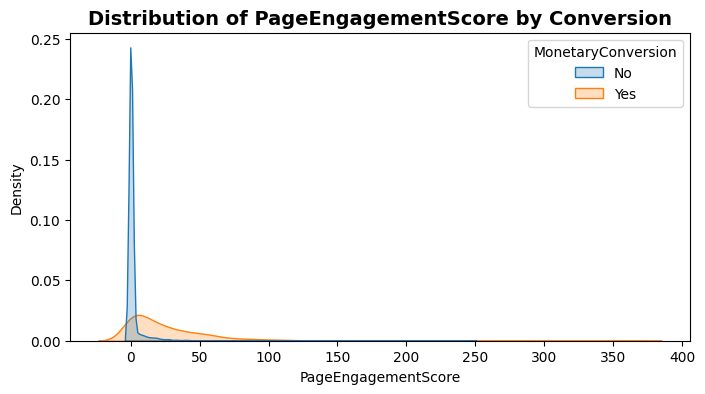

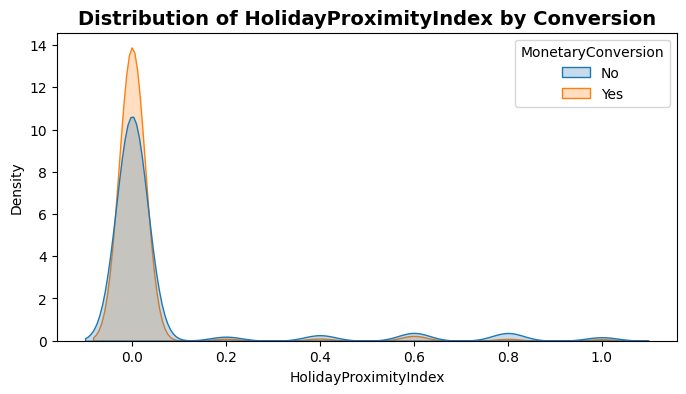

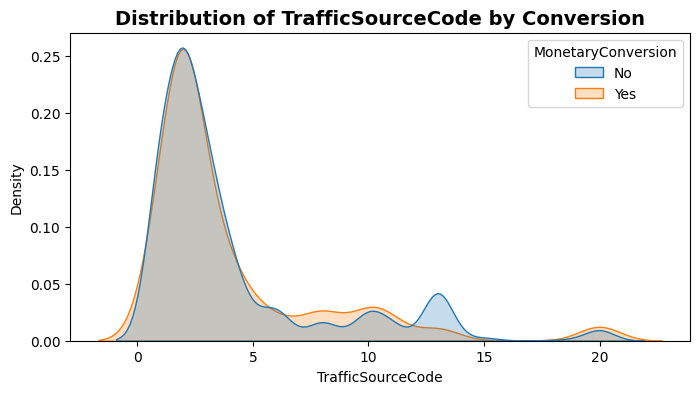

In [243]:
#  Numeric Features vs Target

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue="MonetaryConversion", fill=True, common_norm=False)
    plt.title(f"Distribution of {col} by Conversion", fontsize=14, weight='bold')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

##Insights:

## the orange curve (Yes) is slightly lower overall, showing fewer users convert at each AdClick level.
## users who convert tend to spend a liitle more time on InfoSectionCount, InfoSectionTime, HelpPageVisits.
## The blue curve (No conversion) peaks sharply at very low engagement scores, meaning users who didn’t purchase generally interacted very little.
## A few users (far right) show extremely high engagement scores — these might be heavy users or loyal customers.



/tmp/ipython-input-1465452483.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.values, y=conversion_rate.index, palette="viridis")


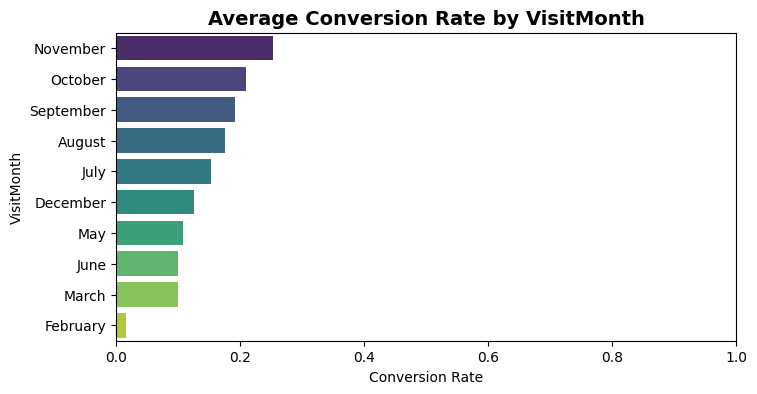

/tmp/ipython-input-1465452483.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.values, y=conversion_rate.index, palette="viridis")


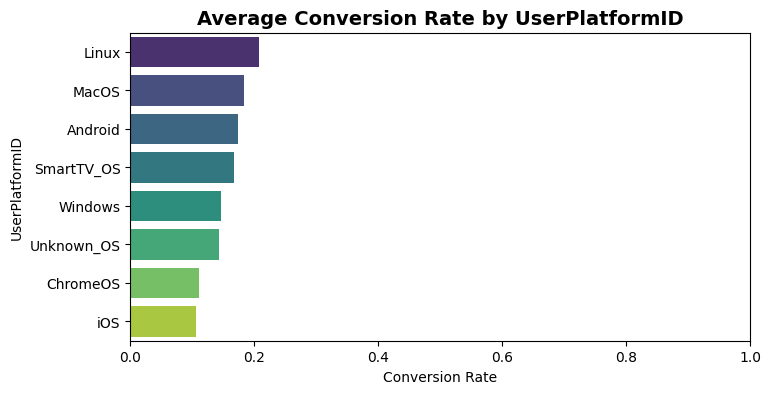

/tmp/ipython-input-1465452483.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.values, y=conversion_rate.index, palette="viridis")


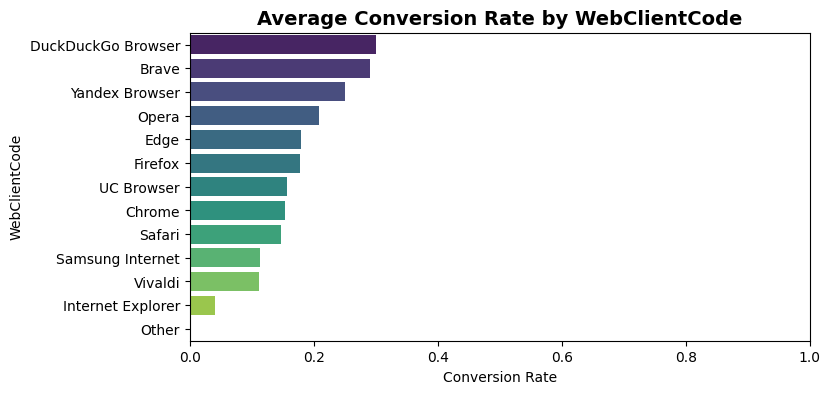

/tmp/ipython-input-1465452483.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.values, y=conversion_rate.index, palette="viridis")


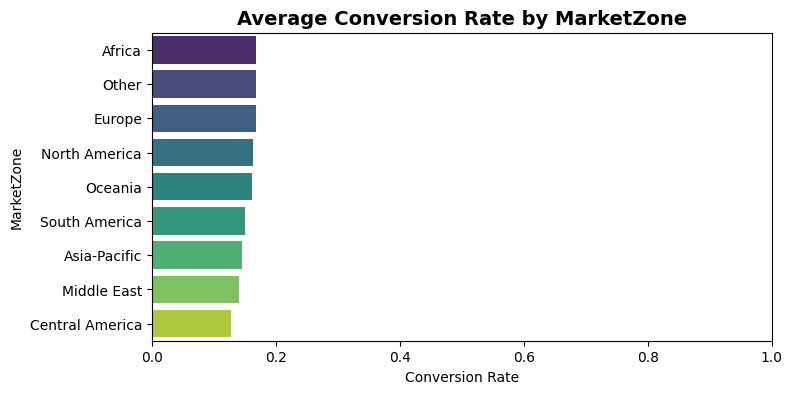

/tmp/ipython-input-1465452483.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate.values, y=conversion_rate.index, palette="viridis")


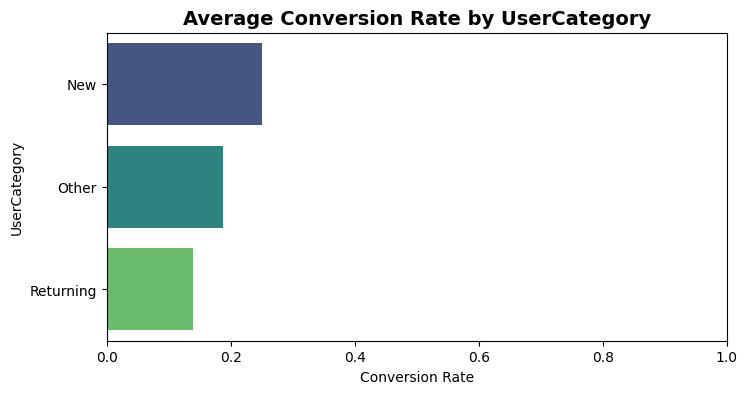

In [344]:
# Categorical Features vs Target

original_categorical_cols = df_original.select_dtypes(include='object').columns.tolist()
cols_to_remove_original = ["SessionID", "MonetaryConversion"] # Exclude target as well
original_categorical_cols_for_plotting = [col for col in original_categorical_cols if col not in cols_to_remove_original]

# Add the label encoded target 'y' as a temporary column to df_original for group by
# This assumes 'y' has the same index as df_original
df_original_temp = df_original.copy()
df_original_temp['MonetaryConversion_encoded'] = y


for col in original_categorical_cols_for_plotting:
    plt.figure(figsize=(8, 4))
    # Calculate the mean of the encoded target variable for each category using df_original_temp
    conversion_rate = df_original_temp.groupby(col)["MonetaryConversion_encoded"].mean().sort_values(ascending=False)
    sns.barplot(x=conversion_rate.values, y=conversion_rate.index, palette="viridis")
    plt.title(f"Average Conversion Rate by {col}", fontsize=14, weight='bold')
    plt.xlabel("Conversion Rate")
    plt.ylabel(col)
    plt.xlim(0, 1)
    plt.show()


Insights:
1. oct and nov has the highest conversion rate
2. Linux, Android and macOS has the highest conversion rate
3. According to global browser studies ,users of privacy-first browsers like DuckDuckGo and Brave often represent tech-savvy or purpose-driven segments — smaller in number but with higher purchase intent.

In [245]:
## label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['MonetaryConversion'] = le.fit_transform(df['MonetaryConversion'])


# Now i will perform multivariate analysis

<Axes: >

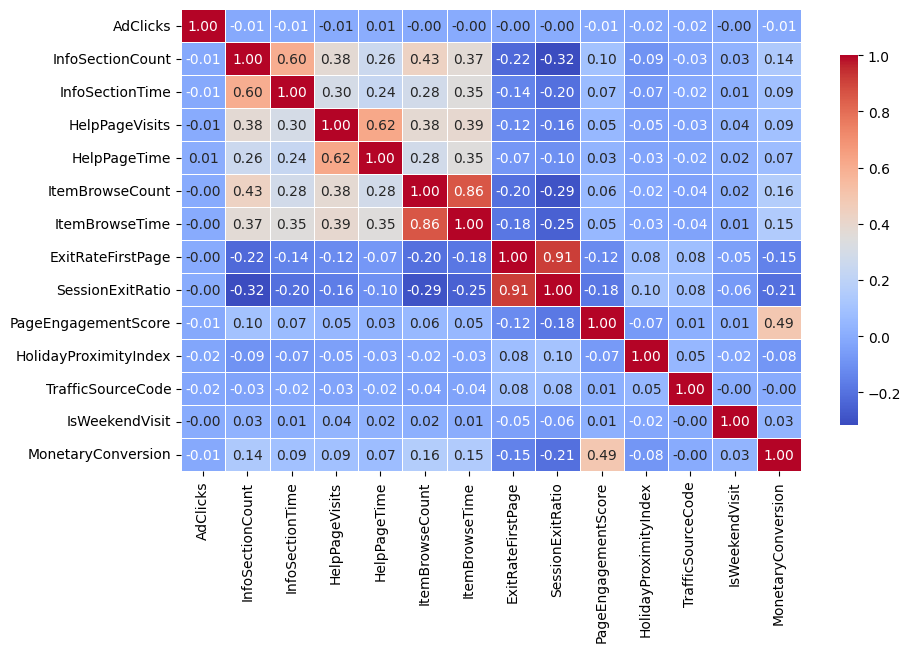

In [246]:
#correlation matrix heatmap showing all numerical variable pairwise relationships.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, linewidths=0.5,fmt=".2f",  cbar_kws={'shrink': 0.8})



Insights:
* ExitRateFirstPage ↔ SessionExitRatio (0.91)
* ItemBrowseCount ↔ ItemBrowseTime (0.86)
* HelpPageVisits ↔ HelpPageTime (0.62)
* PageEngagementScore ↔ MonetaryConversion (0.49)
* No extreme multicollinearity, but browsing-related variables are closely related.

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


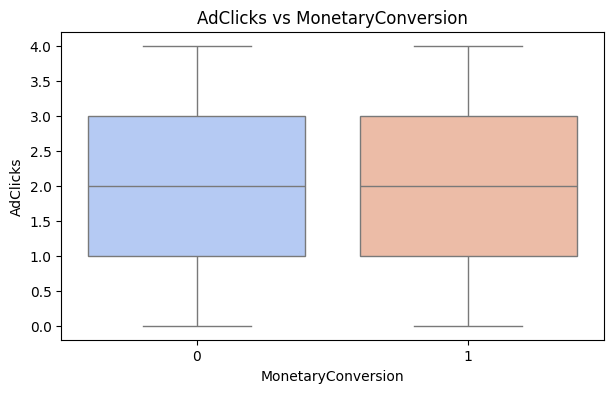

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


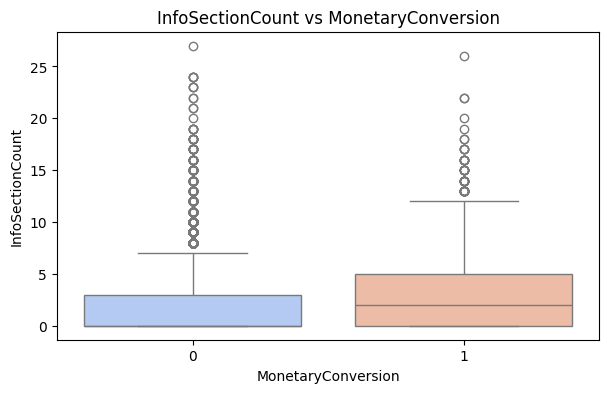

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


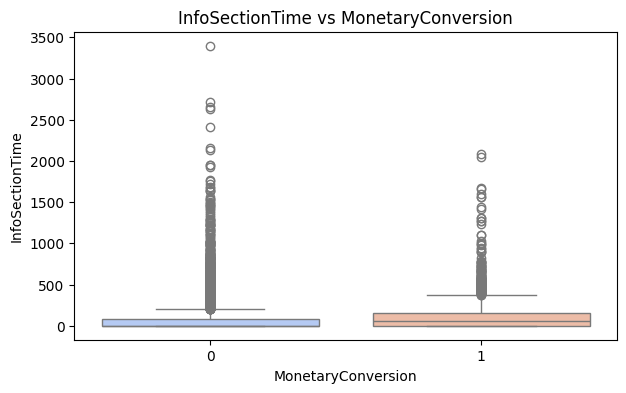

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


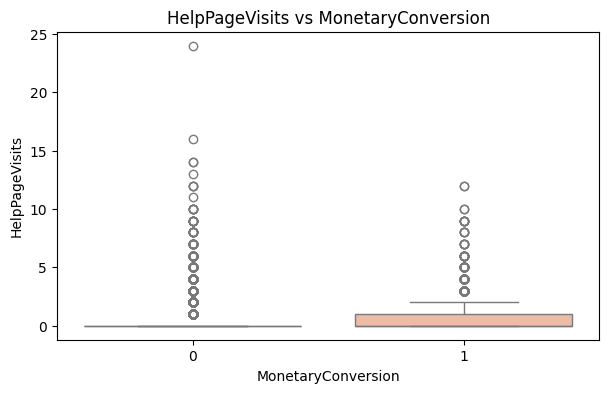

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


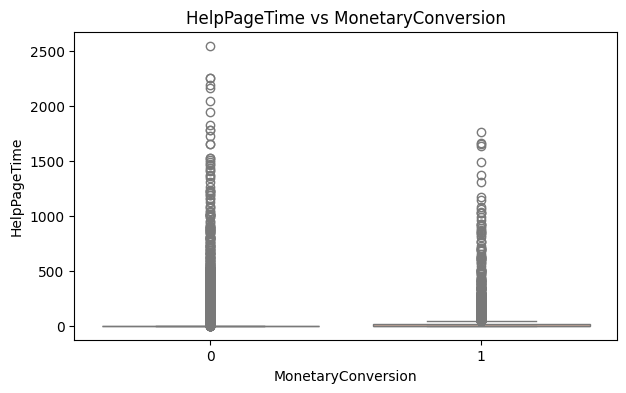

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


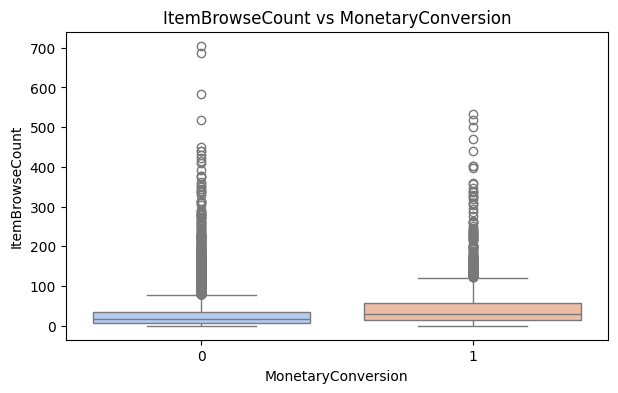

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


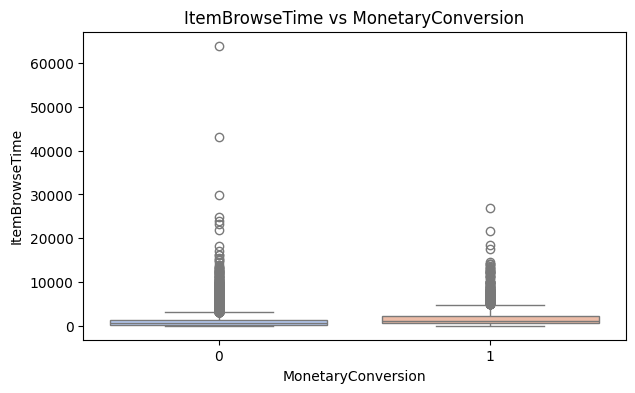

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


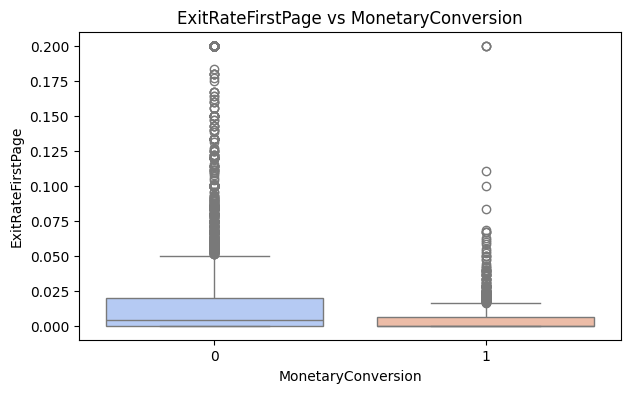

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


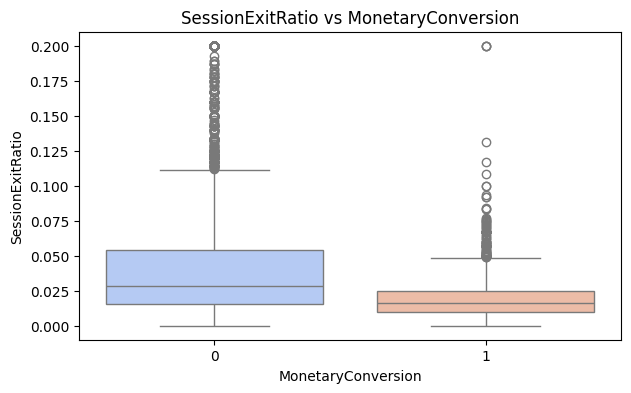

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


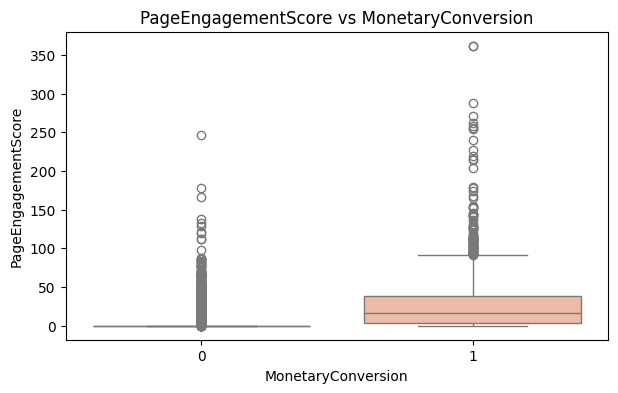

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


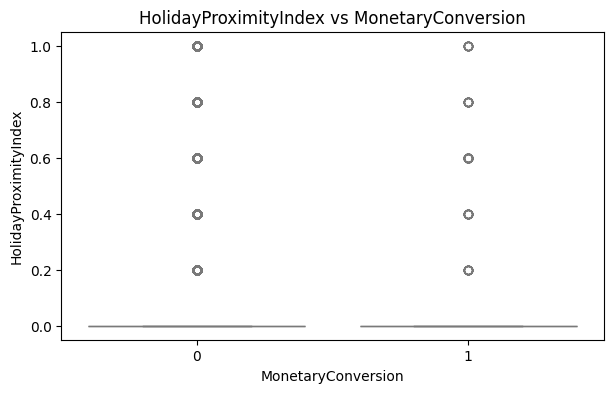

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


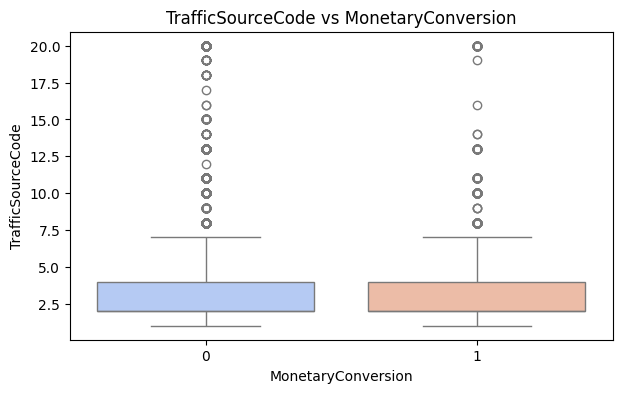

/tmp/ipython-input-2895956024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')


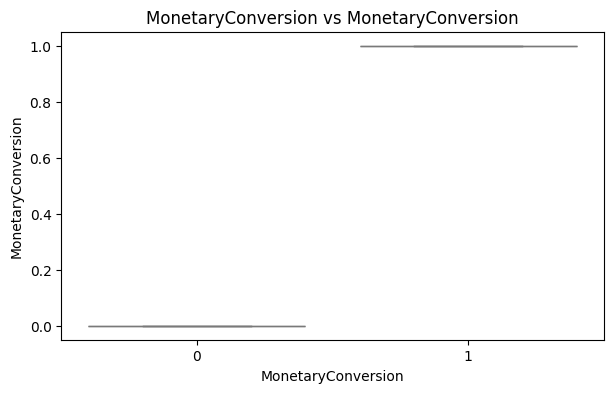

In [247]:
## Boxplot: Numerical featured vs target

num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    if col not in ['ConversionFlag']:
        plt.figure(figsize=(7,4))
        sns.boxplot(x='MonetaryConversion', y=col, data=df, palette='coolwarm')
        plt.title(f"{col} vs MonetaryConversion")
        plt.show()

Infosection count by conversion outcome :
1. Both "Yes" and "No" groups show a large number of outliers (the circles above the boxes).

2. Median (central line in box) for both groups is around 1, meaning most users viewed about 1 info section.

3. The spread (IQR — interquartile range) for “Yes” group is slightly wider, meaning converted users tend to explore a few more information sections than non-converters.

In [248]:
df.isnull().sum()

,0
SessionID,0
AdClicks,863
InfoSectionCount,369
InfoSectionTime,369
HelpPageVisits,246
HelpPageTime,246
ItemBrowseCount,493
ItemBrowseTime,493
ExitRateFirstPage,123
SessionExitRatio,246


In [249]:
df.shape

(12330, 20)

In [250]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [251]:
X_train.shape

(9864, 19)

In [252]:
X_test.shape

(2466, 19)

# Feature scaling : Definig the features and target

In [253]:
## separate features and target

X = df.drop('MonetaryConversion', axis=1)
y = df['MonetaryConversion']




In [254]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [255]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', MinMaxScaler())                    # Standardize numerical features
])


In [256]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categories
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode
])


In [257]:
## combining using column transformer

# Redefine numerical and categorical columns based on X_train
numerical_cols_train = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols_train = X_train.select_dtypes(include='object').columns.tolist()

# Remove 'SessionID' from categorical columns as it's a unique identifier and not for encoding
if 'SessionID' in categorical_cols_train:
    categorical_cols_train.remove('SessionID')

# Ensure 'IsWeekendVisit' (boolean) is treated as categorical if needed for OHE
# It's already handled as boolean number type in select_dtypes(include=np.number), keep it there for now or explicitly list
# For now, let's keep it in numerical_cols_train if it's there

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols_train),
    ('cat', categorical_pipeline, categorical_cols_train)
], remainder='drop') # Changed remainder to 'drop' to drop unlisted columns (like SessionID)

In [258]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()

print("Shape of processed training data:", X_train.shape)

Shape of processed training data: (9864, 55)


In [259]:
feature_names

array(['num__AdClicks', 'num__InfoSectionCount', 'num__InfoSectionTime',
       'num__HelpPageVisits', 'num__HelpPageTime', 'num__ItemBrowseCount',
       'num__ItemBrowseTime', 'num__ExitRateFirstPage',
       'num__SessionExitRatio', 'num__PageEngagementScore',
       'num__HolidayProximityIndex', 'num__TrafficSourceCode',
       'cat__VisitMonth_August', 'cat__VisitMonth_December',
       'cat__VisitMonth_February', 'cat__VisitMonth_July',
       'cat__VisitMonth_June', 'cat__VisitMonth_March',
       'cat__VisitMonth_May', 'cat__VisitMonth_November',
       'cat__VisitMonth_October', 'cat__VisitMonth_September',
       'cat__UserPlatformID_Android', 'cat__UserPlatformID_ChromeOS',
       'cat__UserPlatformID_Linux', 'cat__UserPlatformID_MacOS',
       'cat__UserPlatformID_SmartTV_OS', 'cat__UserPlatformID_Unknown_OS',
       'cat__UserPlatformID_Windows', 'cat__UserPlatformID_iOS',
       'cat__WebClientCode_Brave', 'cat__WebClientCode_Chrome',
       'cat__WebClientCode_DuckDuckGo

In [260]:
X_test.shape

(2466, 55)

In [261]:
df = pd.DataFrame(
    preprocessor.fit_transform(X),
    columns=preprocessor.get_feature_names_out()
)


In [262]:
df.isnull().sum()


,0
num__AdClicks,0
num__InfoSectionCount,0
num__InfoSectionTime,0
num__HelpPageVisits,0
num__HelpPageTime,0
num__ItemBrowseCount,0
num__ItemBrowseTime,0
num__ExitRateFirstPage,0
num__SessionExitRatio,0
num__PageEngagementScore,0


# Here i have used normalisation in above feature scaling instead of standardization beacuse the distribution of data is still unknown and standardization works good for gaussian distribution

# Statistical analysis pipeline

In [263]:
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor, plot_tree


# PDF AND PMF with their CDF

So for checking the probability distribution of the dataset, we will use pmf for discrete variables and pdf for continuous variables.

And before that we will check the discrete and continuous columns from our dataset.

In [264]:
DISCRETE_COLS = [
    'num__AdClicks',
    'num__InfoSectionCount',
    'num__HelpPageVisits',
    'num__ItemBrowseCount',
    'num__TrafficSourceCode'
]

CONTINUOUS_COLS = [
    'num__InfoSectionTime',
    'num__HelpPageTime',
    'num__ItemBrowseTime',
    'num__ExitRateFirstPage',
    'num__SessionExitRatio',
    'num__PageEngagementScore',
    'num__HolidayProximityIndex'
]

def plot_distributions(df, discrete_cols, continuous_cols):
    for col in discrete_cols:
        data = df[col].dropna()
        if data.empty:
            continue
## pmf
        pmf = data.value_counts(normalize=True).sort_index()
        cdf = pmf.cumsum()

        # Adjust for potentially large number of unique values after preprocessing
        if len(pmf) > 50: # Increased threshold for unique values
             # Consider plotting only the most frequent or a sample if still too many
             print(f"Skipping PMF plot for {col}: Too many unique values ({len(pmf)}).")
             continue


        plt.figure(figsize=(12, 5))
        plt.suptitle(f'Discrete Feature: {col}', fontsize=16)

        plt.subplot(1, 2, 1)
        pmf.plot(kind='bar', color='navy')
        plt.title('Probability of Each Value')
        plt.xlabel(col)
        plt.ylabel('Probability')
        plt.xticks(rotation=45, ha='right')

        plt.subplot(1, 2, 2)
        plt.step(cdf.index, cdf.values, where='post', color='green', marker='o', linestyle='-')
        plt.title('Cumulative Probability')
        plt.xlabel(col)
        plt.ylabel('Cumulative Probability')
        plt.ylim(0, 1.05)

        plt.tight_layout()
        plt.show()

## pdf
    for col in continuous_cols:
        data = df[col].dropna()
        if data.empty:
            continue

        plt.figure(figsize=(12, 5))
        plt.suptitle(f'Continuous Feature: {col}', fontsize=16)

        plt.subplot(1, 2, 1)
        sns.kdeplot(data, fill=True, color='purple')
        plt.title('Density of Values (PDF)')
        plt.xlabel(col)
        plt.ylabel('Density')

        sorted_data = np.sort(data)
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        plt.subplot(1, 2, 2)
        plt.step(sorted_data, cdf, where='post', color='orange', marker='o', linestyle='-')
        plt.title('Cumulative Probability')
        plt.xlabel(col)
        plt.ylabel('Cumulative Probability')
        plt.ylim(0, 1.05)

        plt.tight_layout()
        plt.show()

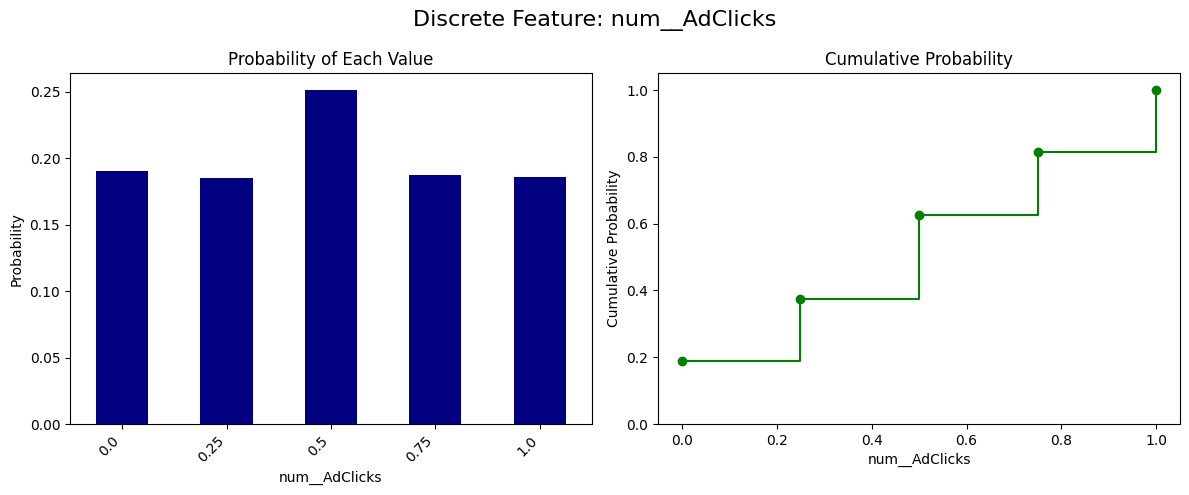

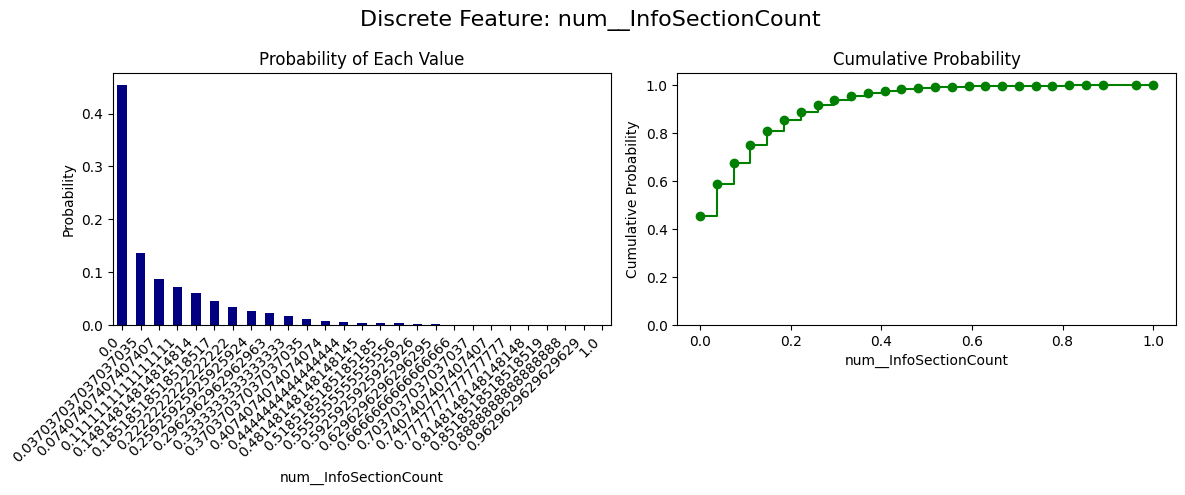

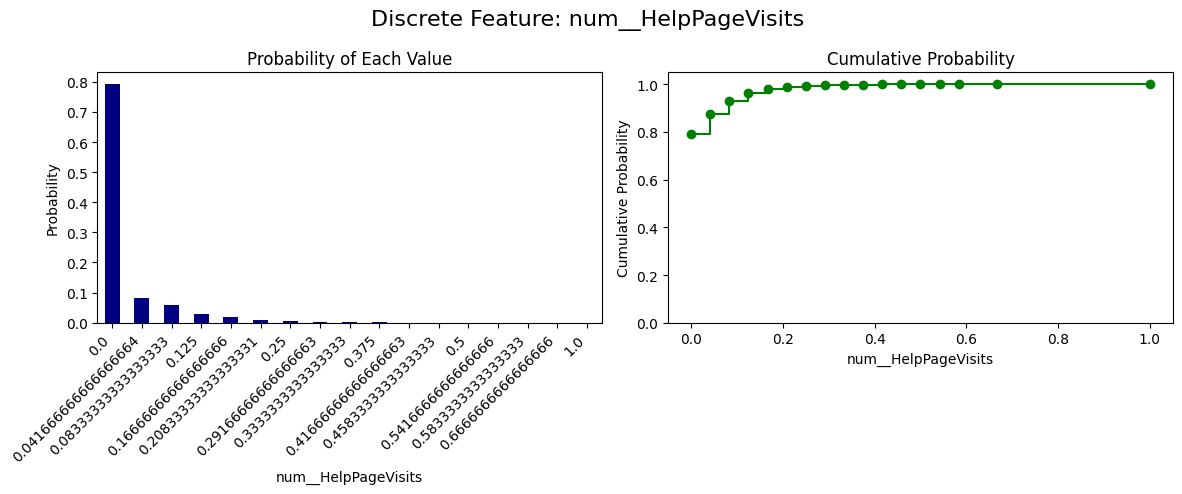

Skipping PMF plot for num__ItemBrowseCount: Too many unique values (306).


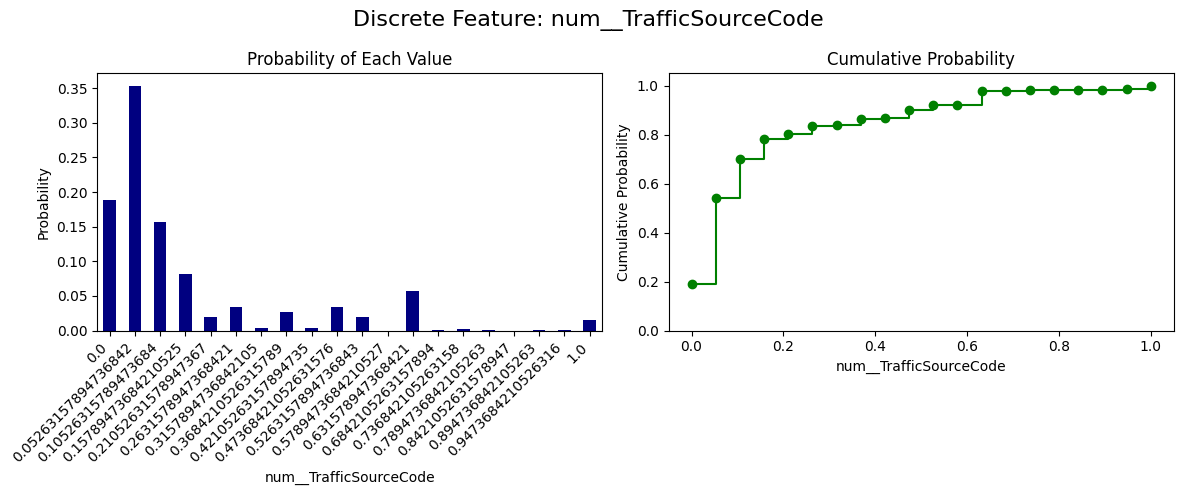

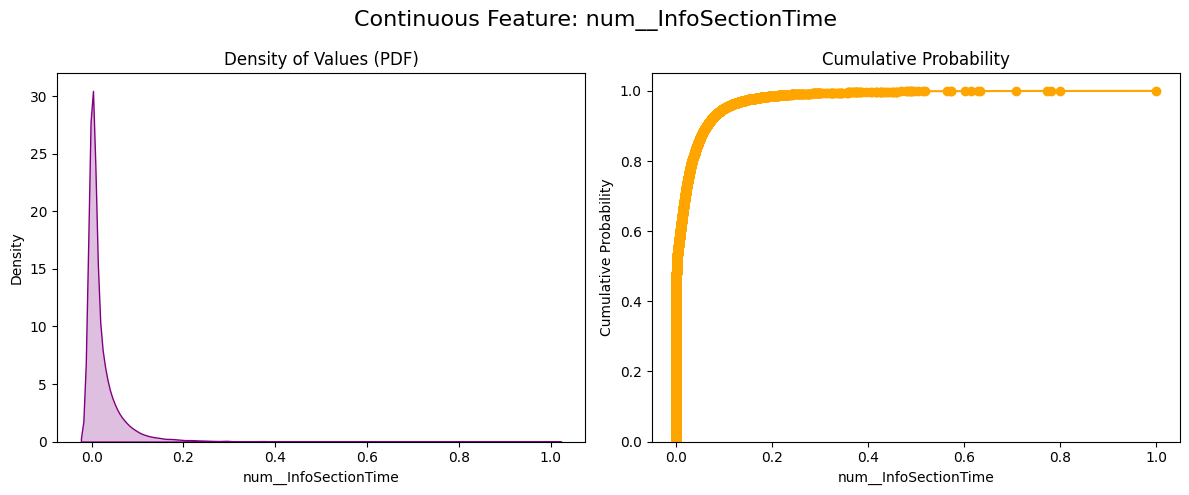

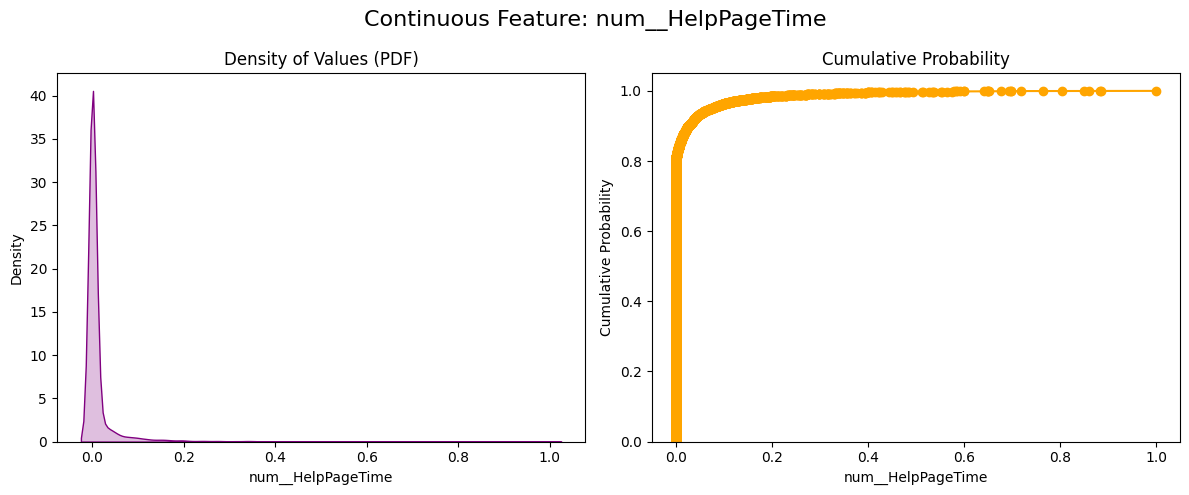

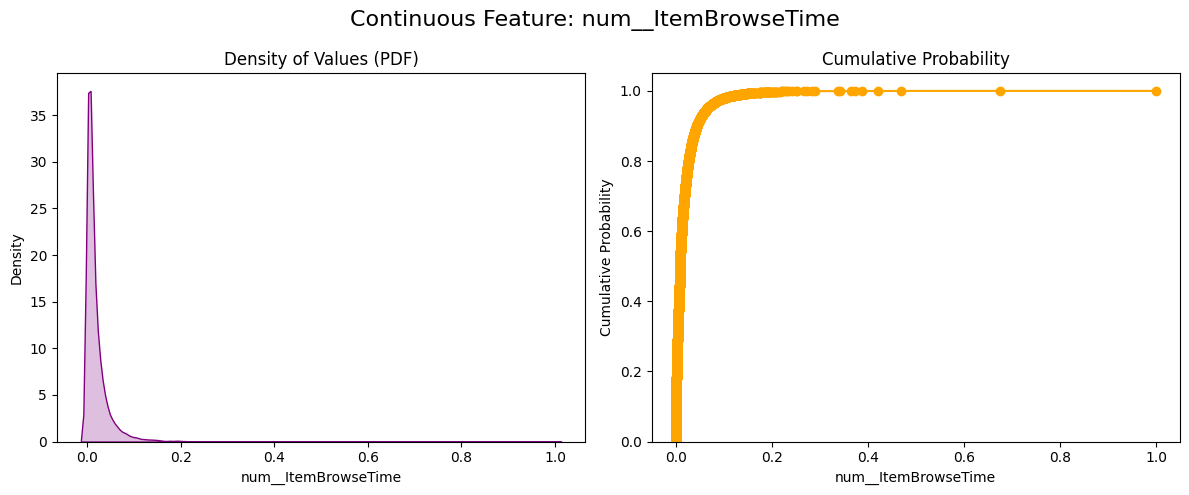

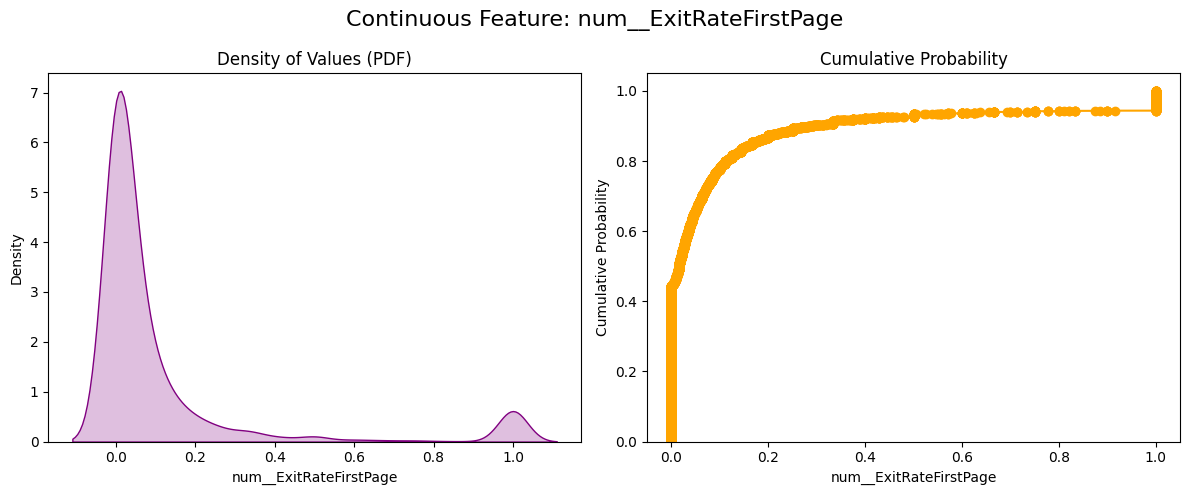

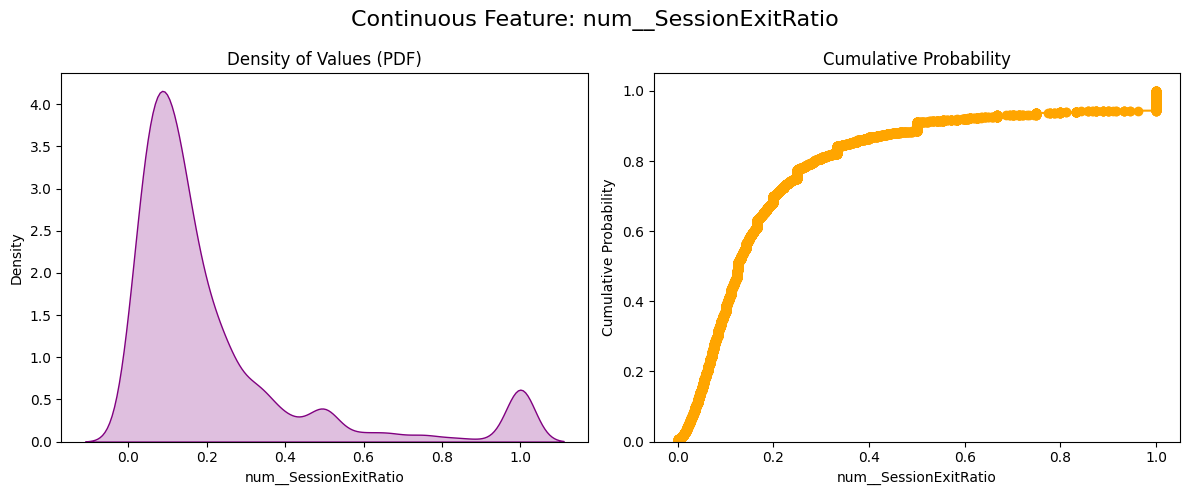

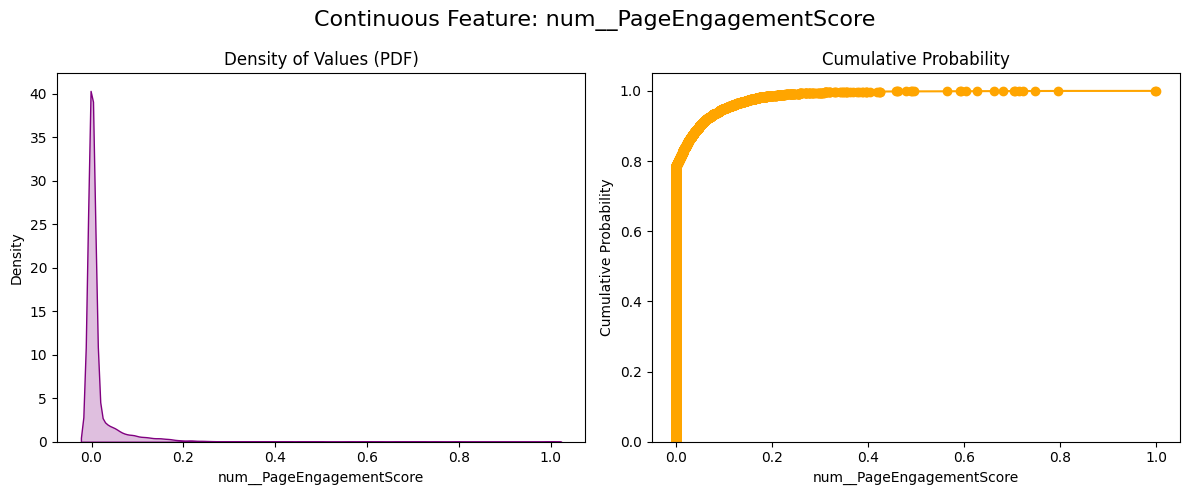

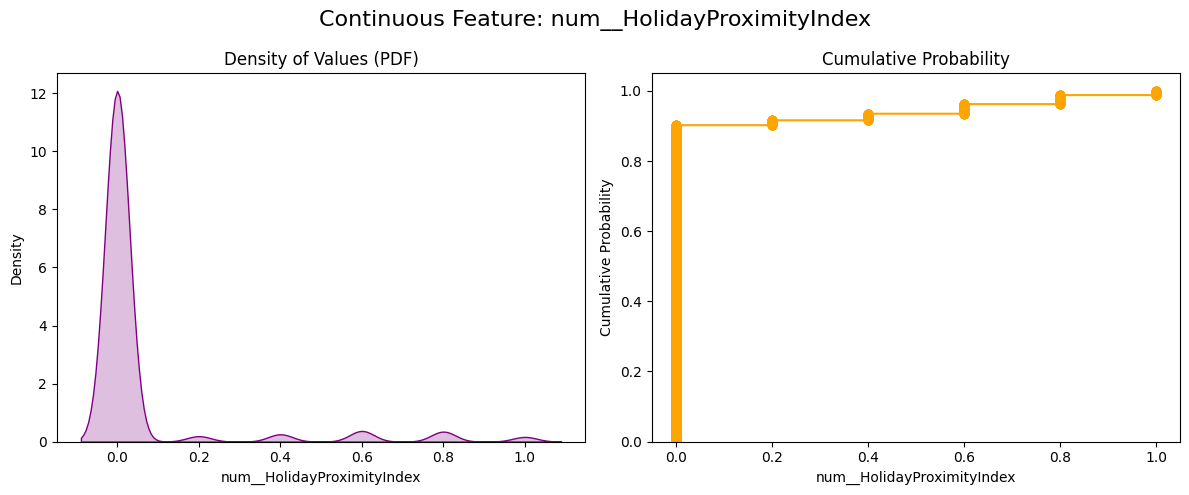

In [265]:
plot_distributions(df, DISCRETE_COLS, CONTINUOUS_COLS)

# QQ plots - Compare your data’s quantiles with a normal distribution.

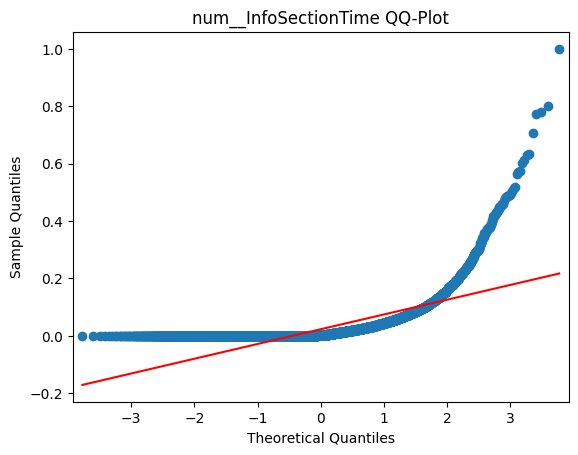

num__InfoSectionTime interpretation:


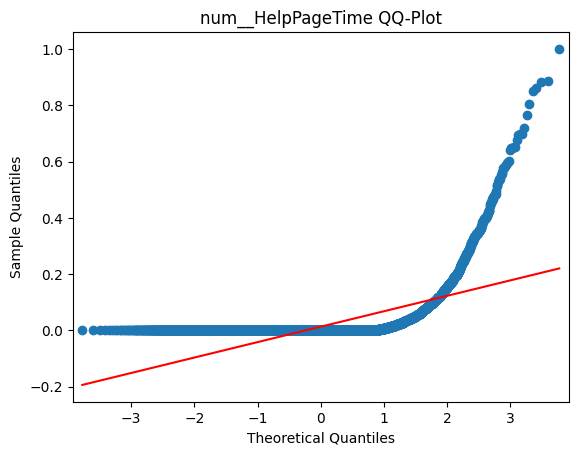

num__HelpPageTime interpretation:


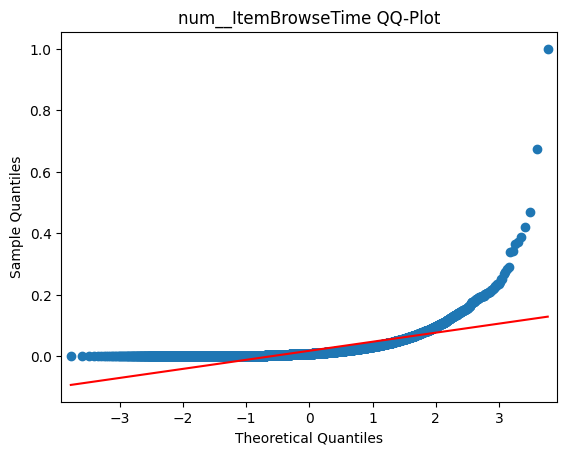

num__ItemBrowseTime interpretation:


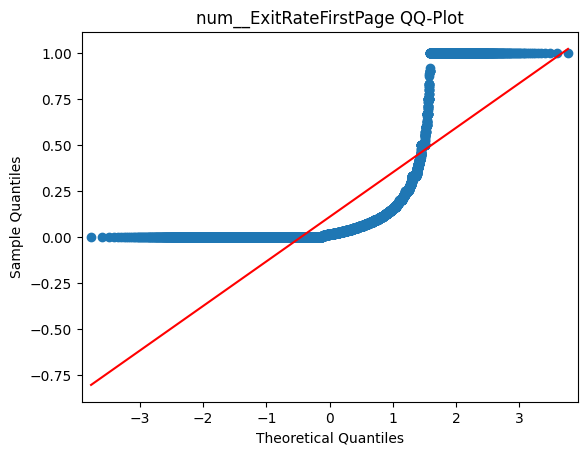

num__ExitRateFirstPage interpretation:


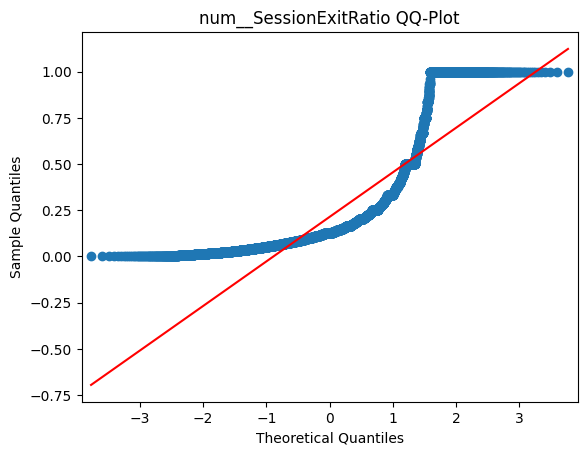

num__SessionExitRatio interpretation:


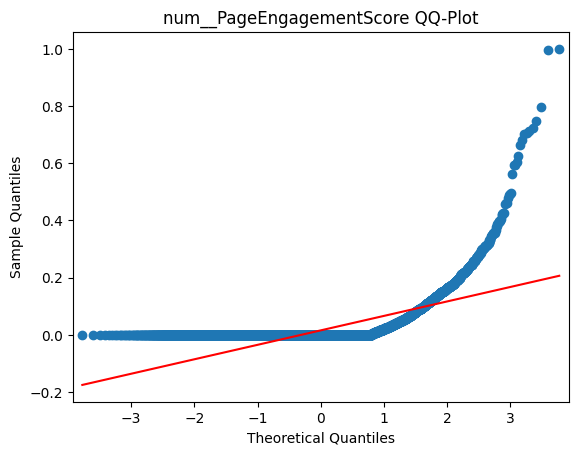

num__PageEngagementScore interpretation:


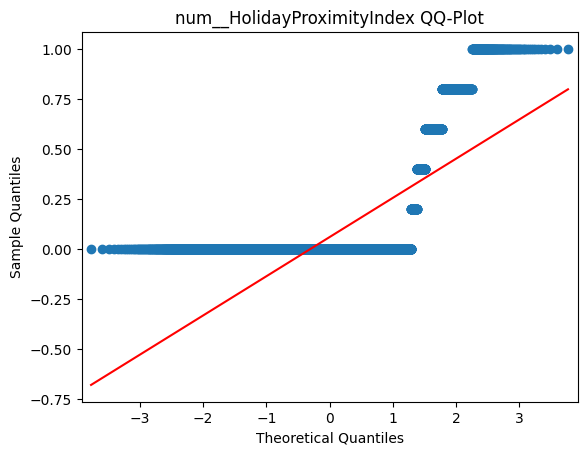

num__HolidayProximityIndex interpretation:


In [266]:

for col in CONTINUOUS_COLS:
    data = df[col].dropna()
    sm.qqplot(data, line='s')
    plt.title(f"{col} QQ-Plot")
    plt.show()
    print(f"{col} interpretation:")



# Points close to line → approx normal and  Points curve away → skewed or heavy/light tails


## Outlier Detection using IQR METHOD

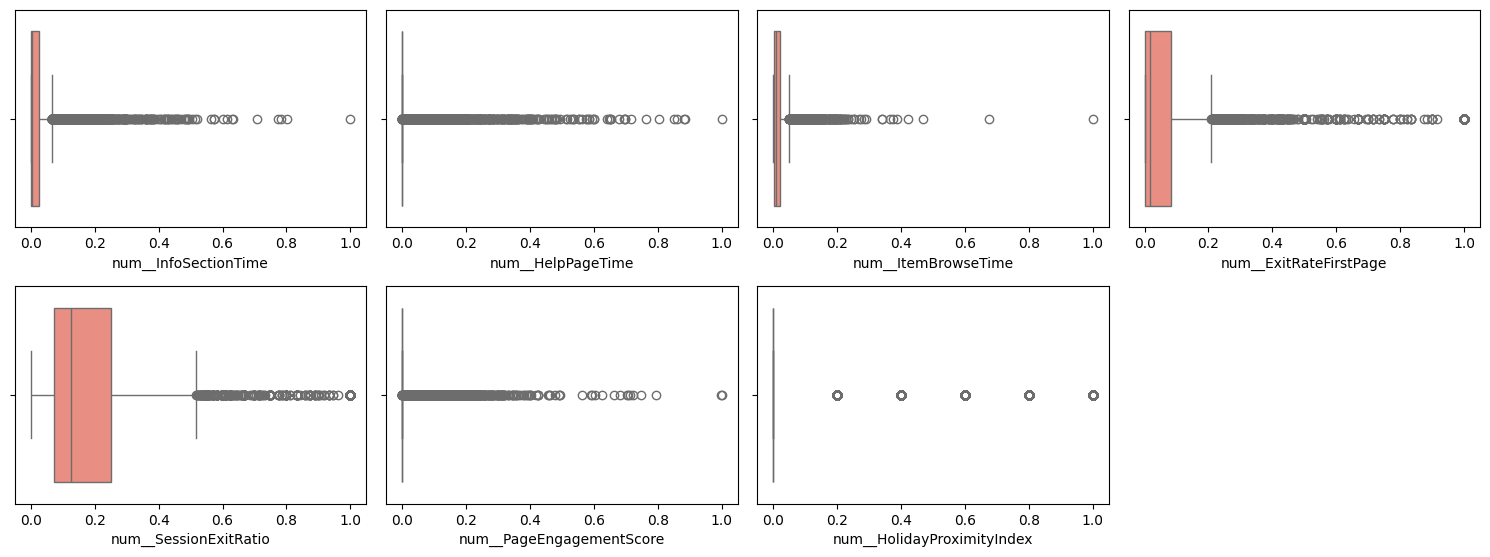

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Redefine CONTINUOUS_COLS with prefixed names to ensure correctness in this cell
CONTINUOUS_COLS = [
    'num__InfoSectionTime',
    'num__HelpPageTime',
    'num__ItemBrowseTime',
    'num__ExitRateFirstPage',
    'num__SessionExitRatio',
    'num__PageEngagementScore',
    'num__HolidayProximityIndex'
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(CONTINUOUS_COLS, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color="salmon")

plt.tight_layout()
plt.show()

In [268]:
df_capped = df.copy()

for col in CONTINUOUS_COLS:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap the outliers instead of removing
    df_capped[col] = np.where(df_capped[col] < lower_limit, lower_limit,
                              np.where(df_capped[col] > upper_limit, upper_limit, df_capped[col]))

print(f"Original shape: {df.shape}")
print(f"After capping outliers: {df_capped.shape}")


Original shape: (12330, 55)
After capping outliers: (12330, 55)


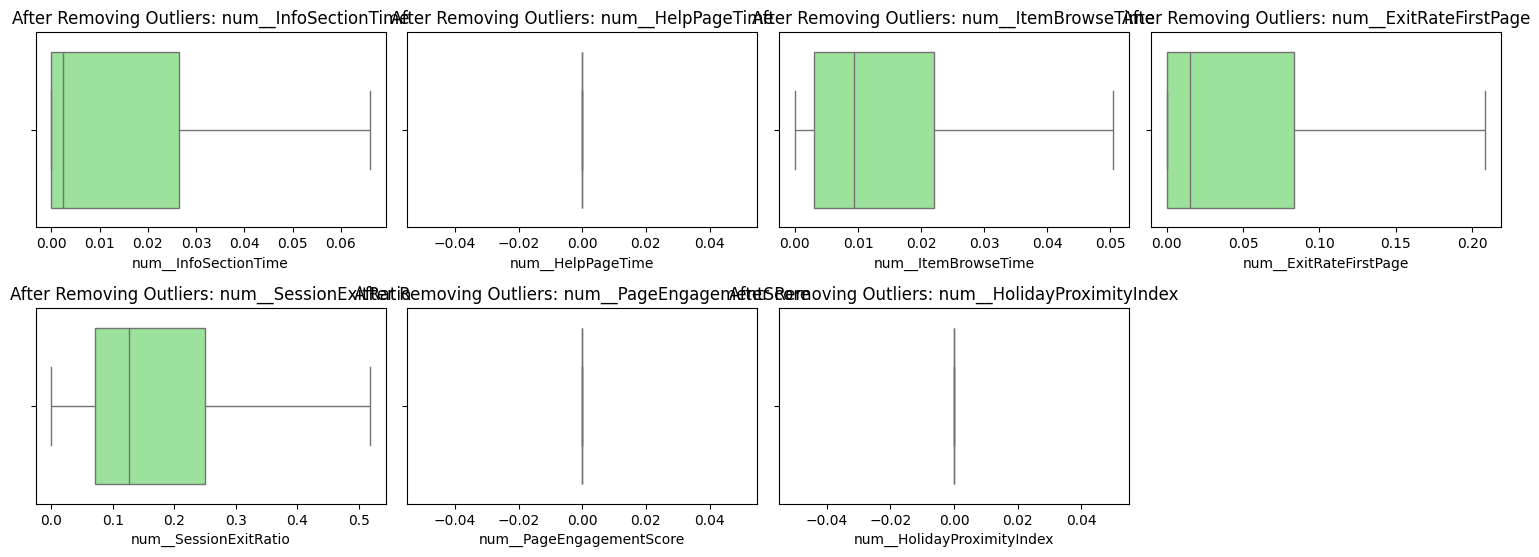

In [269]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(CONTINUOUS_COLS, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_capped[col], color="lightgreen")
    plt.title(f"After Removing Outliers: {col}")
plt.tight_layout()
plt.show()


In [270]:
import pandas as pd

# Store counts of capped values
capped_summary = {}

for col in CONTINUOUS_COLS:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Count how many values were below or above thresholds
    lower_outliers = (df[col] < lower_limit).sum()
    upper_outliers = (df[col] > upper_limit).sum()
    total_capped = lower_outliers + upper_outliers

    capped_summary[col] = {
        "Lower Outliers": lower_outliers,
        "Upper Outliers": upper_outliers,
        "Total Capped": total_capped
    }

# Display as DataFrame
capped_df = pd.DataFrame(capped_summary).T
print("Outlier Counts (before capping):")
display(capped_df)


Outlier Counts (before capping):


,Lower Outliers,Upper Outliers,Total Capped
num__InfoSectionTime,0,1205,1205
num__HelpPageTime,0,2345,2345
num__ItemBrowseTime,0,1011,1011
num__ExitRateFirstPage,0,1540,1540
num__SessionExitRatio,0,1082,1082
num__PageEngagementScore,0,2644,2644
num__HolidayProximityIndex,0,1207,1207


# Building Logistic regression

In [289]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, roc_auc_score, classification_report
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the full pipeline
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Logistic Regression Model with Pipeline:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Logistic Regression Model with Pipeline:
Accuracy: 0.8633
Precision: 0.8526
Recall: 0.8633
F1-Score: 0.8333

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2055
           1       0.77      0.26      0.38       411

    accuracy                           0.86      2466
   macro avg       0.82      0.62      0.65      2466
weighted avg       0.85      0.86      0.83      2466



ROC-AUC measures how well your model distinguishes between the classes (0 vs 1).

For Class 1, which is the smaller group in the data:

* When the model predicts someone is in Class 1, it is correct about 78% of the time, so its predictions are fairly reliable.
* But out of all the actual Class 1 cases, the model only identifies 24%, meaning it misses most of them.
* Because it predicts correctly sometimes but misses many true cases, the F1-score is low at 0.37, showing the model has difficulty detecting this group.


| Metric                   | Meaning                                                                            |
| ------------------------ | ---------------------------------------------------------------------------------- |
| **Precision**            | Out of all predictions the model said “this is class X”, how many were actually X. |
| **Recall** (Sensitivity) | Out of all actual Xs, how many did the model correctly identify.                   |
| **F1-score**             | Harmonic mean of precision and recall. Good when you want a balance between both.  |
| **Support**              | Number of actual samples in each class.                                            |


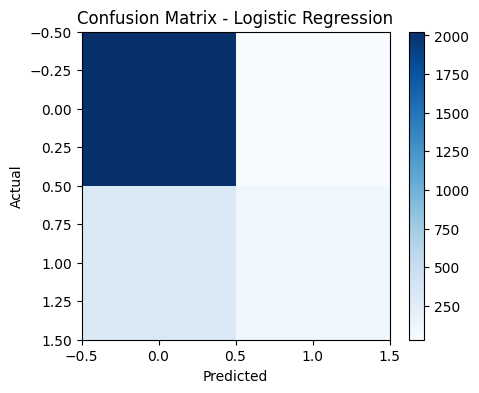

In [290]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
plt.title("Confusion Matrix - Logistic Regression")
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [296]:
y_proba_lr = model_pipeline.predict_proba(X_test)[:, 1]

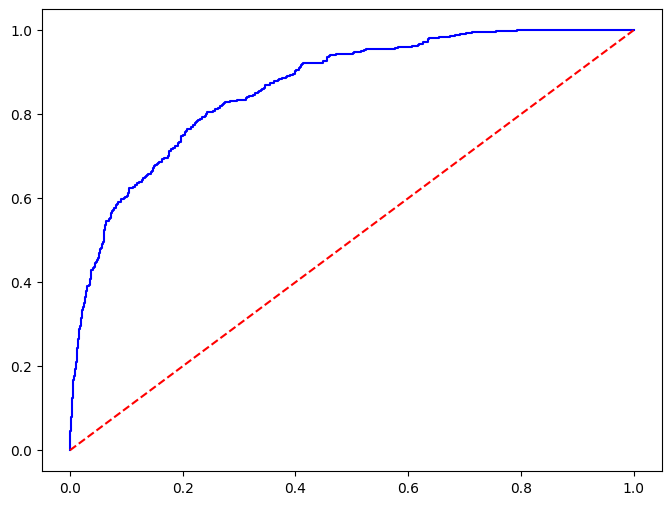

In [297]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier")


# Decision tree

In [325]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(class_weight='balanced',random_state=42,max_depth=5))
])

dt_pipeline.fit(X_train, y_train)
y_pred = dt_pipeline.predict(X_test)

Accuracy: 0.8382
Precision: 0.5087
Recall: 0.8516
F1 Score: 0.6369
ROC-AUC Score: 0.9065

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      2055
           1       0.51      0.85      0.64       411

    accuracy                           0.84      2466
   macro avg       0.74      0.84      0.77      2466
weighted avg       0.89      0.84      0.85      2466



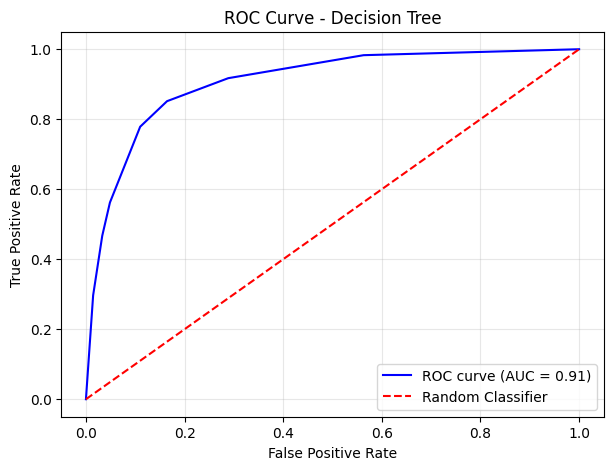

In [313]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate predicted probabilities for ROC AUC calculation
y_proba = dt_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [326]:
y_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

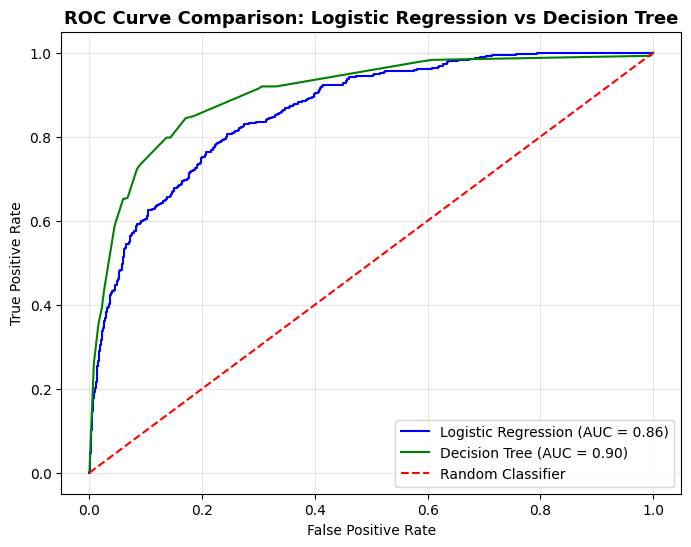

In [327]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, color='green', label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier")

plt.title("ROC Curve Comparison: Logistic Regression vs Decision Tree", fontsize=13, weight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# conclusion

1. Decision Tree catches more positives than Logistic Regression (higher recall for class 1).

2. Accuracy is slightly higher, but weighted metrics are similar.

3. Model is fairly balanced

4. Decision Trees are easy to interpret — you can see how features split the data.

# Random forest

In [316]:
from sklearn.ensemble import RandomForestClassifier


In [317]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,             # control overfitting
        min_samples_split=5,
        min_samples_leaf=4,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])


In [318]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]


In [319]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.8698
Precision: 0.5795
Recall: 0.7981
F1 Score: 0.6714
ROC-AUC Score: 0.9147

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      2055
           1       0.58      0.80      0.67       411

    accuracy                           0.87      2466
   macro avg       0.77      0.84      0.80      2466
weighted avg       0.89      0.87      0.88      2466



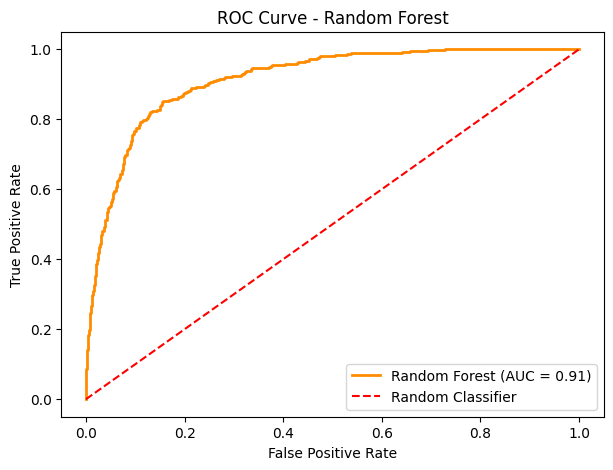

In [328]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf) # Assign the AUC score to roc_auc_rf

plt.figure(figsize=(7,5))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

Hence, Why Random Forest is Best:

Highest accuracy and F1-score overall.

Excellent recall for minority class, without sacrificing too much precision.

Stable and robust — handles noise and overfitting better than Decision Tree or KNN.

High ROC-AUC (~0.9) proves strong discriminative ability.

Works well with the SMOTE-balanced dataset.

/tmp/ipython-input-3162044443.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lr_df, x='Importance', y='Feature', ax=axes[0], palette='coolwarm')
/tmp/ipython-input-3162044443.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dt_df, x='Importance', y='Feature', ax=axes[1], palette='viridis')
/tmp/ipython-input-3162044443.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_df, x='Importance', y='Feature', ax=axes[2], palette='mako')


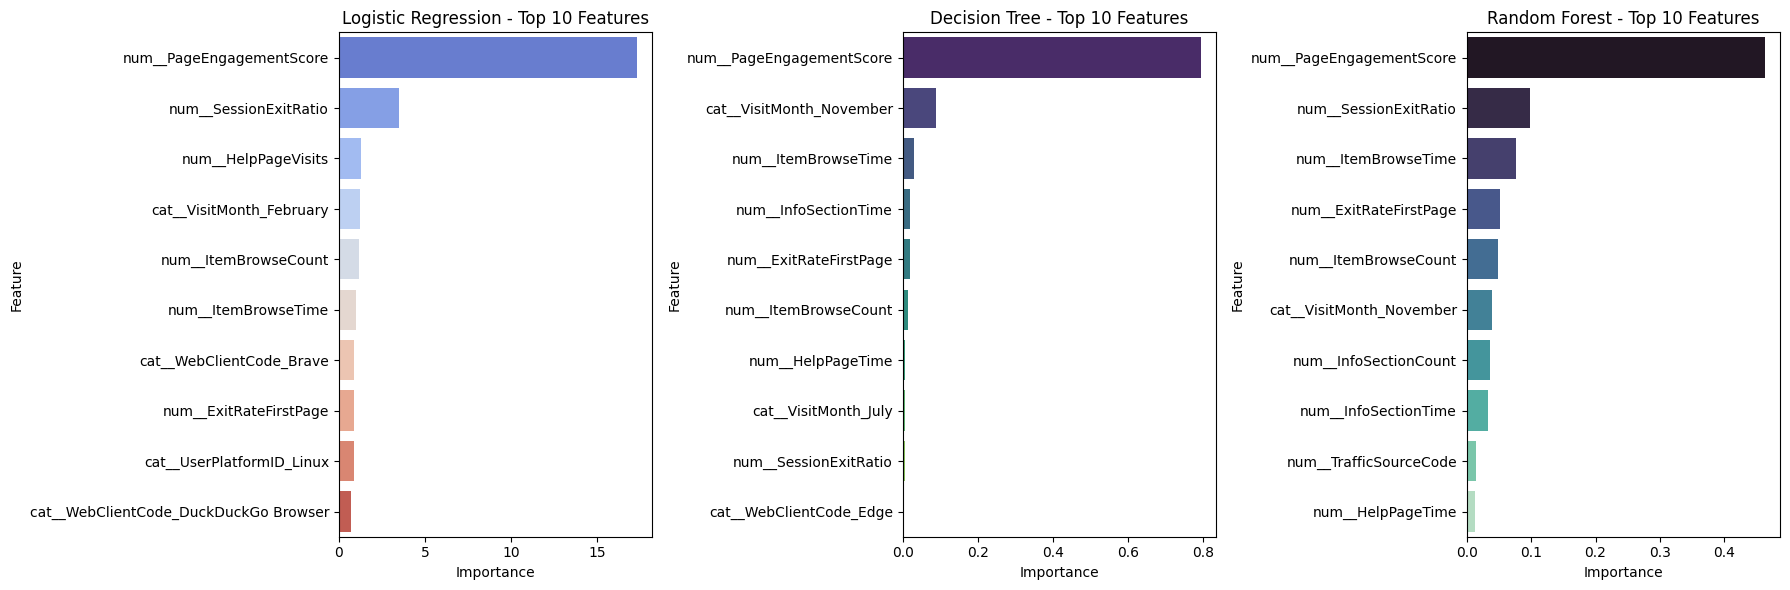

In [333]:
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out() # Using rf_pipeline's preprocessor as an example, assuming they are the same

# Logistic Regression coefficients
# Corrected step name from 'model' to 'classifier'
lr_importance = abs(model_pipeline.named_steps['classifier'].coef_[0])
lr_df = pd.DataFrame({'Feature': feature_names, 'Importance': lr_importance}).nlargest(10, 'Importance')

# Decision Tree feature importances
# Step name is 'model' in dt_pipeline
dt_importance = dt_pipeline.named_steps['model'].feature_importances_
dt_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importance}).nlargest(10, 'Importance')

# Random Forest feature importances
# Corrected step name from 'model' to 'classifier'
rf_importance = rf_pipeline.named_steps['classifier'].feature_importances_
rf_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importance}).nlargest(10, 'Importance')

# Plot all
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(data=lr_df, x='Importance', y='Feature', ax=axes[0], palette='coolwarm')
axes[0].set_title('Logistic Regression - Top 10 Features')

sns.barplot(data=dt_df, x='Importance', y='Feature', ax=axes[1], palette='viridis')
axes[1].set_title('Decision Tree - Top 10 Features')

sns.barplot(data=rf_df, x='Importance', y='Feature', ax=axes[2], palette='mako')
axes[2].set_title('Random Forest - Top 10 Features')

plt.tight_layout()
plt.show()